In [3]:
import whisper

model = whisper.load_model("base")

result = model.transcribe("audio/bayle2.wav", word_timestamps=True)


In [4]:
# Print the detected language
print("Detected Language:", result["language"])

# Print the entire transcription with detailed segment data
for segment in result["segments"]:
    print(f"Segment {segment['id']}:")
    print(f"  Start: {segment['start']} seconds")
    print(f"  End: {segment['end']} seconds")
    print(f"  Text: {segment['text']}")
    
    # Print word-level details
    for word in segment['words']:
        print(f"    Word: {word['word']}")
        print(f"      Start: {word['start']} seconds")
        print(f"      End: {word['end']} seconds")
        print(f"      Probability: {word['probability']}")
    
    print()


Detected Language: en


In [6]:
import whisper
import torch

# Load the Whisper model
model = whisper.load_model("large-v1")

# Load and preprocess the audio
audio = whisper.load_audio("audio/parm_de_nat1.wav")
audio = whisper.pad_or_trim(audio)

# Convert the audio into the log-mel spectrogram
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# Reshape the mel spectrogram to match the expected input dimensions
mel = mel.unsqueeze(0)  # Add a batch dimension (1, num_mels, num_frames)

# Access the encoder component directly
encoder = model.encoder

# Pass the mel spectrogram through the encoder
with torch.no_grad():
    encoder_output = encoder(mel)

# encoder_output now contains the latent representation from the encoder
print(encoder_output.shape)
print(encoder_output)


torch.Size([1, 1500, 1280])
tensor([[[-0.0394, -0.3724, -0.3187,  ...,  0.2133, -1.8665, -1.4743],
         [ 0.7021,  0.1595,  0.0154,  ..., -0.5517, -1.5932, -1.8826],
         [ 0.5747, -0.3578,  0.8499,  ..., -0.6749, -1.4008, -1.4635],
         ...,
         [-0.1616, -0.4493,  0.0924,  ...,  0.5366, -0.4027,  0.2221],
         [-0.3796, -0.1815,  0.0128,  ...,  0.4901, -0.4759,  0.2119],
         [-0.6564,  0.1667, -0.1292,  ...,  0.5606, -0.3980,  0.1976]]],
       device='cuda:0')


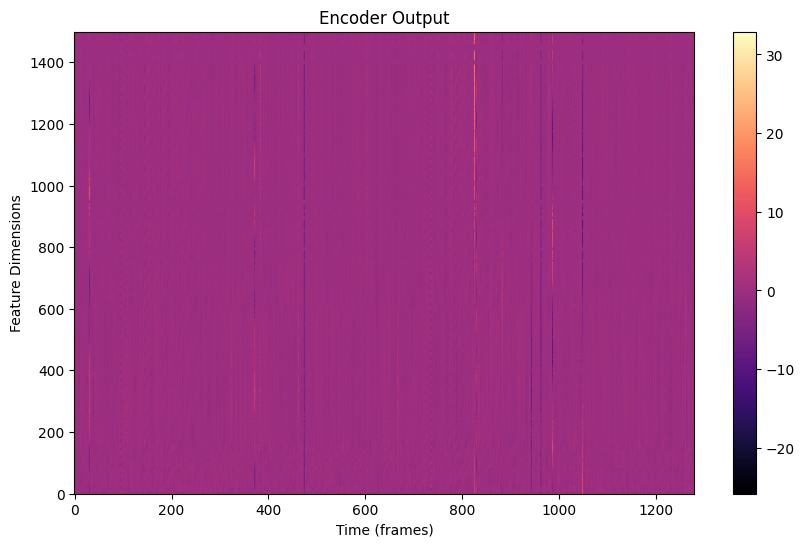

In [4]:
import matplotlib.pyplot as plt

# Plot a heatmap of the encoder output
plt.figure(figsize=(10, 6))
plt.imshow(encoder_output.squeeze().cpu().numpy(), aspect='auto', origin='lower', cmap='magma')
plt.colorbar()
plt.title("Encoder Output")
plt.xlabel("Time (frames)")
plt.ylabel("Feature Dimensions")
plt.show()


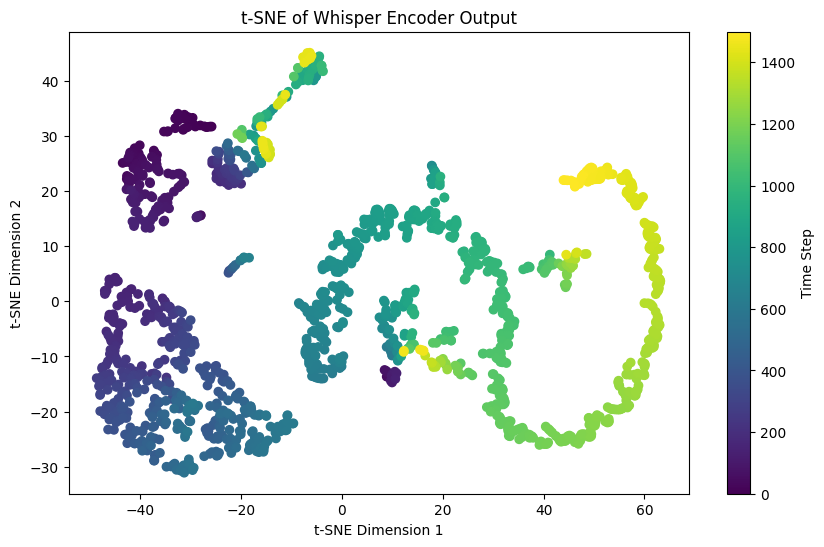

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming encoder_output is the output from the Whisper encoder, with shape (1, 1500, 1280)
encoder_output_np = encoder_output.squeeze(0).cpu().numpy()  # Shape: (1500, 1280)

# Perform t-SNE to reduce the 1280-dimensional vectors to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
encoder_output_2d = tsne.fit_transform(encoder_output_np)  # Shape: (1500, 2)

# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(encoder_output_2d[:, 0], encoder_output_2d[:, 1], c=range(encoder_output_2d.shape[0]), cmap='viridis')
plt.colorbar(label='Time Step')
plt.title("t-SNE of Whisper Encoder Output")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


C:\Users\egorp\miniconda3\envs\py3124t\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


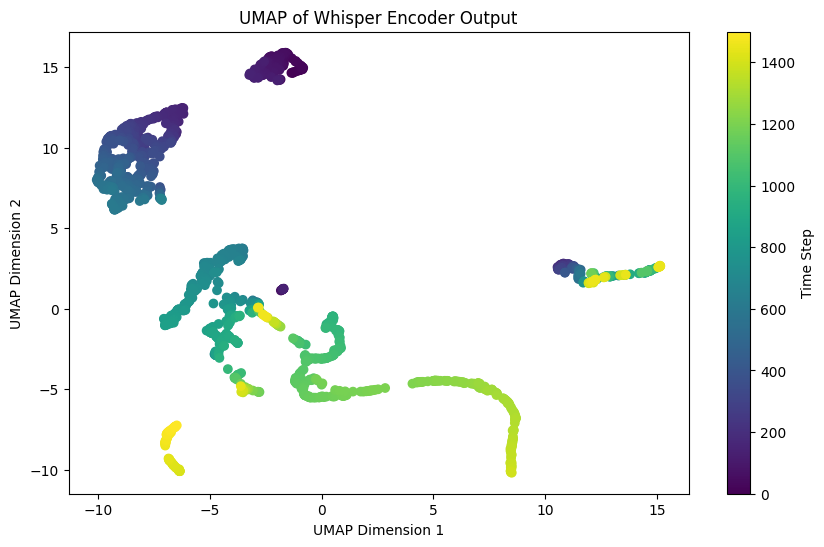

In [6]:
import umap

# Assuming encoder_output is the output from the Whisper encoder, with shape (1, 1500, 1280)
encoder_output_np = encoder_output.squeeze(0).cpu().numpy()  # Shape: (1500, 1280)

# Perform UMAP to reduce the 1280-dimensional vectors to 2 dimensions
umap_reducer = umap.UMAP(n_components=2, random_state=42)
encoder_output_2d = umap_reducer.fit_transform(encoder_output_np)  # Shape: (1500, 2)

# Plot the UMAP result
plt.figure(figsize=(10, 6))
plt.scatter(encoder_output_2d[:, 0], encoder_output_2d[:, 1], c=range(encoder_output_2d.shape[0]), cmap='viridis')
plt.colorbar(label='Time Step')
plt.title("UMAP of Whisper Encoder Output")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


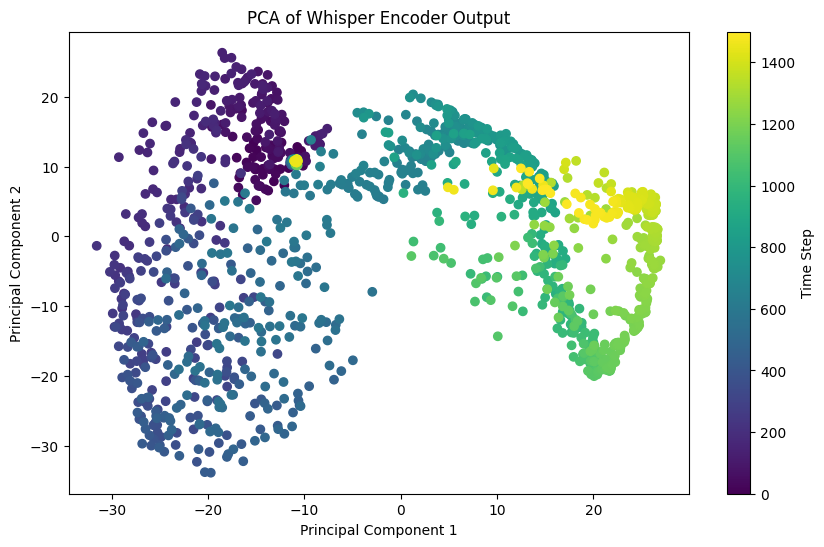

Explained variance by the first two components: [0.23758732 0.12743561]


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming encoder_output is the output from the Whisper encoder, with shape (1, 1500, 1280)
encoder_output_np = encoder_output.squeeze(0).cpu().numpy()  # Shape: (1500, 1280)

# Perform PCA to reduce the 1280-dimensional vectors to 2 dimensions
pca = PCA(n_components=2)
encoder_output_pca = pca.fit_transform(encoder_output_np)  # Shape: (1500, 2)

# Plot the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(encoder_output_pca[:, 0], encoder_output_pca[:, 1], c=range(encoder_output_pca.shape[0]), cmap='viridis')
plt.colorbar(label='Time Step')
plt.title("PCA of Whisper Encoder Output")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Print explained variance ratio for the first two components
print(f"Explained variance by the first two components: {pca.explained_variance_ratio_}")
